In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
traffic = pd.read_csv(r"C:\Users\joshu\Downloads\Metro_Interstate_Traffic_Volume.csv")
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [10]:
traffic['holiday'].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [11]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [12]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


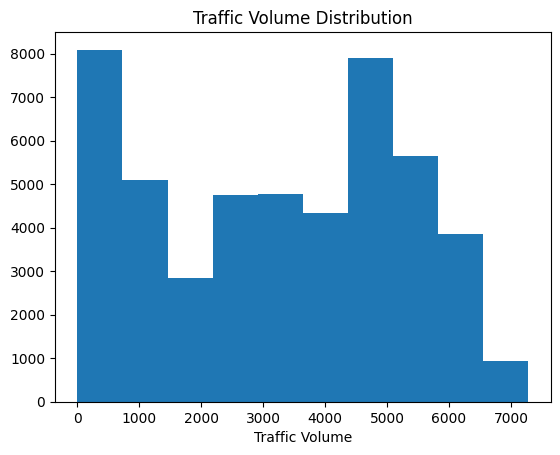

In [14]:
plt.hist(traffic["traffic_volume"])
plt.xlabel("Traffic Volume")
plt.title("Traffic Volume Distribution")
plt.show()

In [16]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
night.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,NaN,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,NaN,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,NaN,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,NaN,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,NaN,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963


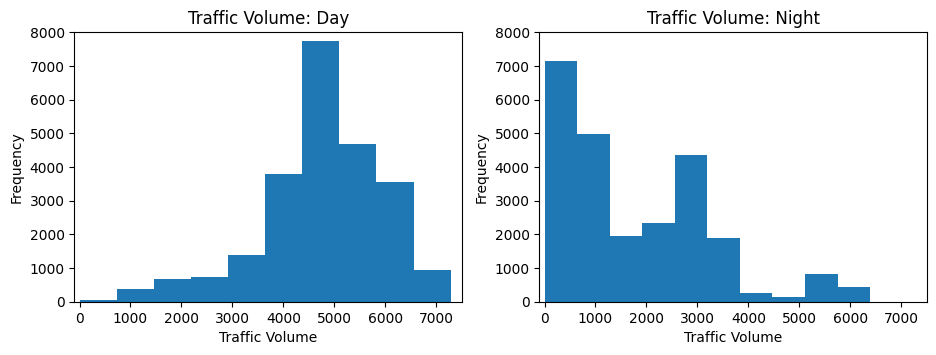

In [17]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [18]:
day.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,2016-01-05 00:55:02.676215552,4762.047452
min,0.000000,0.00000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.680000,0.00000,0.000000,5.000000,2014-02-04 10:00:00,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,2016-06-12 11:00:00,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,2017-08-14 14:00:00,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,2018-09-30 18:00:00,7280.000000
std,13.298885,63.62932,0.008853,37.564588,NaN,1174.546482


In [19]:
night.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,2016-01-05 20:26:34.672585984,1785.377441
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 19:00:00,0.000000
25%,271.700000,0.000000,0.000000,1.000000,2014-02-08 20:30:00,530.000000
50%,281.379000,0.000000,0.000000,40.000000,2016-06-09 23:00:00,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2017-08-08 20:30:00,2819.000000
max,307.680000,55.630000,0.510000,100.000000,2018-09-30 23:00:00,6386.000000
std,13.296357,1.110872,0.007434,40.048382,NaN,1441.951197


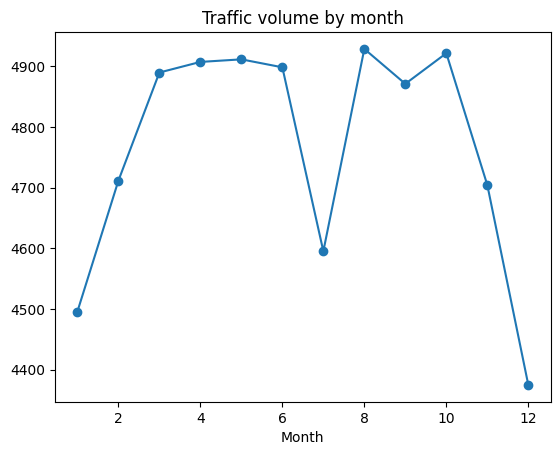

In [23]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean(numeric_only=True)
plt.plot(by_month['traffic_volume'], marker='o')
plt.title('Traffic volume by month')
plt.xlabel('Month')
plt.show()

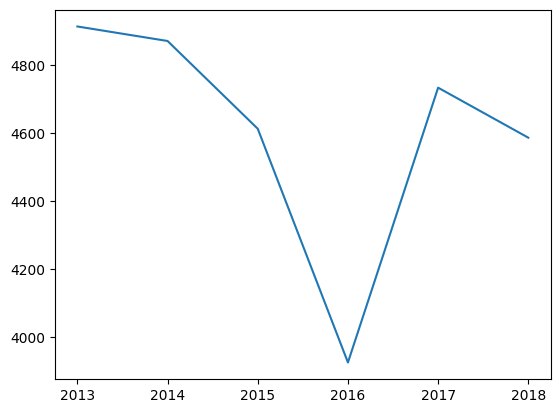

In [24]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
plt.plot(only_july.groupby('year').mean(numeric_only=True)['traffic_volume'])
plt.show()

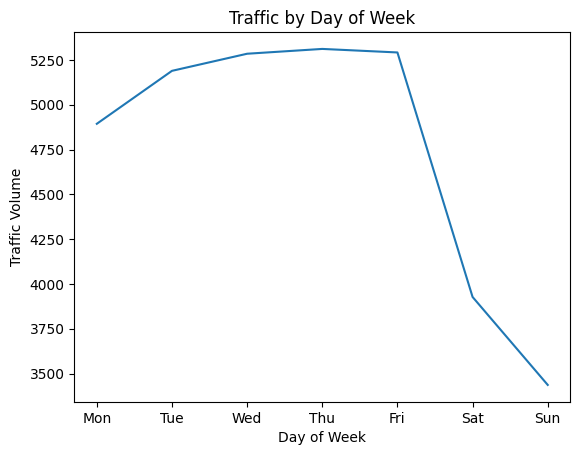

In [25]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean(numeric_only=True)
plt.plot(by_dayofweek['traffic_volume'])

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days)), days)
plt.xlabel('Day of Week')
plt.ylabel('Traffic Volume')
plt.title('Traffic by Day of Week')
plt.show()

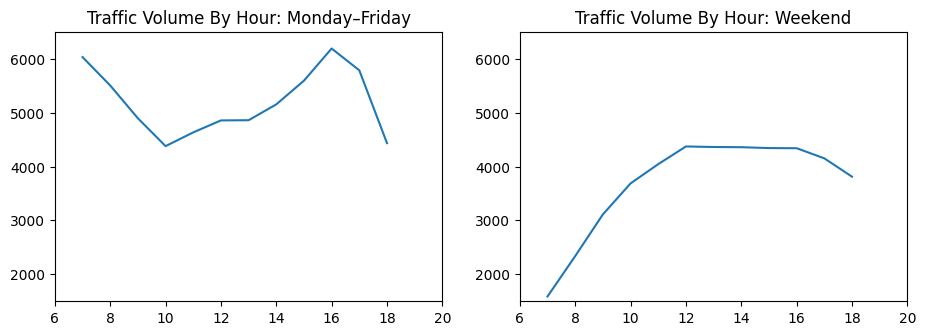

In [26]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

In [29]:
weather_cols = ['clouds_all', 'snow_1h', 'rain_1h', 'temp', 'traffic_volume']
day[weather_cols].corr(numeric_only=True)['traffic_volume'].sort_values()

clouds_all       -0.032932
snow_1h           0.001265
rain_1h           0.003697
temp              0.128317
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

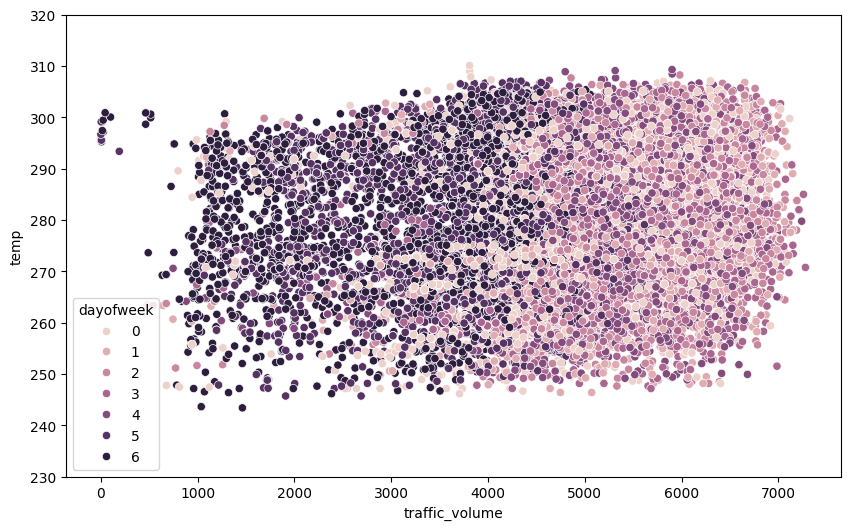

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='traffic_volume', y='temp', hue='dayofweek', data=day)
plt.ylim(230, 320)
plt.show()

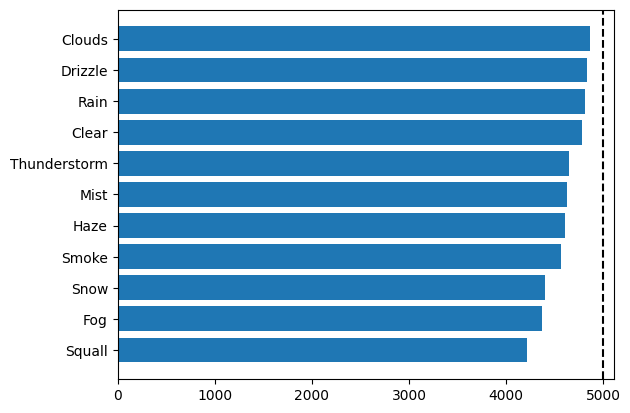

In [31]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True).sort_values('traffic_volume')
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.axvline(x=5000,linestyle="--",color="k")
plt.show()

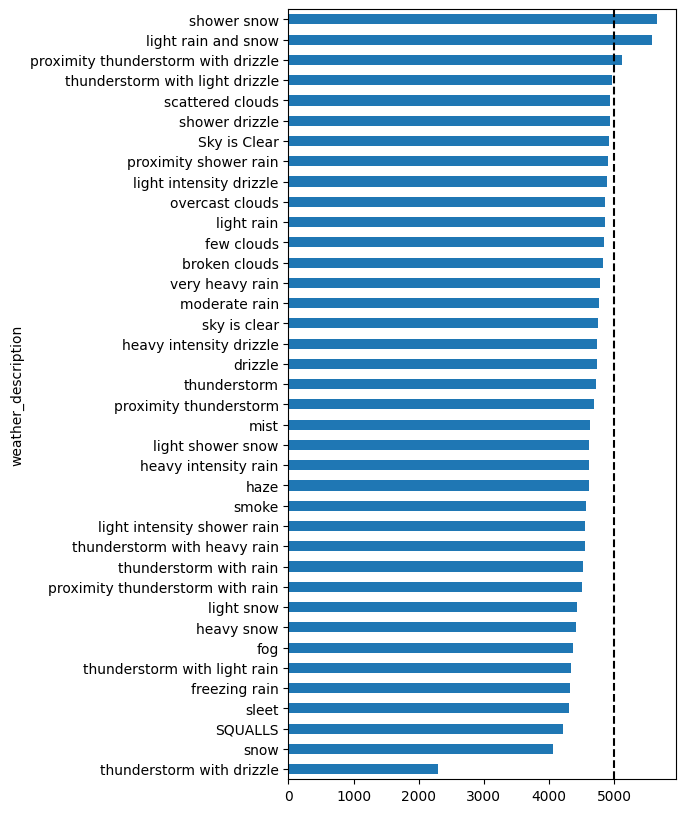

In [32]:
by_weather_description = day.groupby('weather_description').mean(numeric_only=True).sort_values('traffic_volume')
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.axvline(x=5000,linestyle="--",color="k")
plt.show()

In [34]:
day.groupby('weather_description').count().sort_values('traffic_volume')['dayofweek']

weather_description
SQUALLS                                   1
shower snow                               1
thunderstorm with drizzle                 2
freezing rain                             2
sleet                                     3
shower drizzle                            3
light rain and snow                       4
thunderstorm with light drizzle           6
proximity thunderstorm with drizzle       6
very heavy rain                           7
light intensity shower rain              10
light shower snow                        11
smoke                                    12
proximity thunderstorm with rain         18
thunderstorm with rain                   20
thunderstorm with light rain             23
thunderstorm with heavy rain             25
heavy intensity drizzle                  29
thunderstorm                             48
proximity shower rain                   111
snow                                    137
heavy intensity rain                    219
drizzle     

In [55]:
by_weather = day.groupby('weather_main').mean(numeric_only=True)['traffic_volume']
print(by_weather)

simultaneous = day[(day['rain_1h'] > 0) & (day['snow_1h'] > 0)]
print(simultaneous['traffic_volume'].describe())

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64
count       4.0
mean     5167.0
std         0.0
min      5167.0
25%      5167.0
50%      5167.0
75%      5167.0
max      5167.0
Name: traffic_volume, dtype: float64


In [56]:
weather_cols = ['clouds_all', 'snow_1h', 'rain_1h', 'temp', 'traffic_volume']
print(day[weather_cols].corr(numeric_only=True)['traffic_volume'])

clouds_all       -0.032932
snow_1h           0.001265
rain_1h           0.003697
temp              0.128317
traffic_volume    1.000000
Name: traffic_volume, dtype: float64


In [ ]:
# Days with consistent rain
rainy_days = day.groupby('date').filter(lambda x: (x['rain_1h'] > 0).all())
print(rainy_days['traffic_volume'].describe())



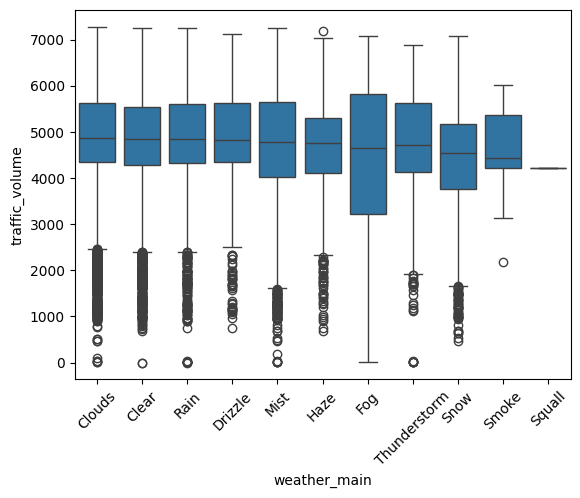

In [62]:
sns.boxplot(x='weather_main', y='traffic_volume', data=day)
plt.xticks(rotation=45)
plt.show()

In [64]:
day['date'] = day['date_time'].dt.date  
rainy_days = day.groupby('date').filter(lambda x: (x['rain_1h'] > 0).all())
print(rainy_days['traffic_volume'].describe())

# Days with consistent snow
snowy_days = day.groupby('date').filter(lambda x: (x['snow_1h'] > 0).all())
print(snowy_days['traffic_volume'].describe())

count     340.000000
mean     4746.008824
std      1066.265201
min       939.000000
25%      4329.000000
50%      4785.000000
75%      5494.000000
max      6747.000000
Name: traffic_volume, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: traffic_volume, dtype: float64


In [65]:
normal_days = day[(day['rain_1h'] == 0) & (day['snow_1h'] == 0)]
print(normal_days['traffic_volume'].describe())

count    22076.000000
mean      4762.455834
std       1174.289633
min          0.000000
25%       4249.000000
50%       4817.000000
75%       5560.000000
max       7280.000000
Name: traffic_volume, dtype: float64
